# Einführung Graphen

Viele komplexe Strukturen der realen Welt können mit Hilfe von Graphen intuitiv beschrieben und analysiert werden. Ein <b>Graph</b> G=(V,E) besteht dabei aus einer Menge von <b>Knoten</b> V (engl. vertices) und <b>Kanten</b> E (engl. edges). E ist dabei im ungerichteten Falle eine Teilmenge der Menge aller zweielementigen Teilmengen von V (ggf. ist im Falle, dass Schleifen zulässig sind auch einelementige Mengen dazu) und im gerichteten Falle eine Teilmenge des kartesischen Produktes $V \times V$.

Ein Beispiel:

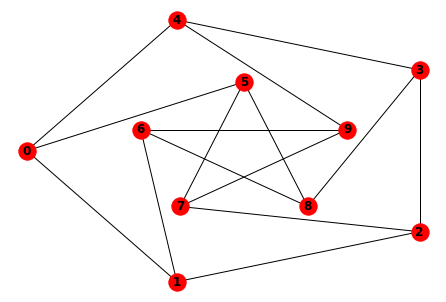

In [7]:
%matplotlib inline
import networkx as nx
g=nx.petersen_graph()
import matplotlib.pyplot as plt
nx.draw_shell(g, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',node_color='red')

Das ist der Petersen-Graph (benannt nach Julius Petersen, einem dänischen Mathematiker). Der Graph sieht einfach aus, kann aber als Beispiel für verschiedene durchaus komplexe Aspekte dienen. So ist der Graph zusammenhängend (es gibt keine "isolierten" Areale) und jeder Knoten ist mit genau drei anderen Knoten verbunden und hat somit Grad drei. Diese Begriffe werden später noch genauer definiert.

Das geht auch bunter...

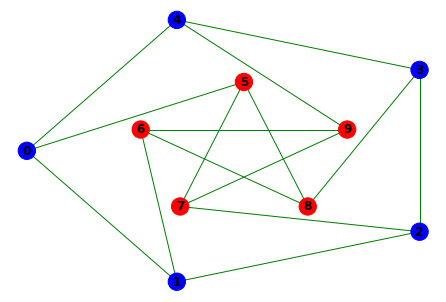

In [8]:
# g only references graph if fragement above was executed before
color_map = []
for node in g:
    if node < 5:
        color_map.append('blue')
    else: color_map.append('red')      
nx.draw_shell(g, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold',node_color = color_map, edge_color='green')
plt.show()

Offensichlich kann man Gebilde wie das Internet, Computer-Netzwerke im Allgemeinen, aber auch soziale Netzwerke als Graphen beschreiben (was sind hier eigentlich die Knoten und was sind die Kanten?). Auch für Wertpapiertransaktionen und Handelsbeziehungen (auch hier die Frage: Was sind dann die Knoten?) können Graphen Einblicke und Einsichten möglich machen. Knoten und Kanten können in derartigen Modellen also sowohl physische Objekte wie auch virtuelle, intangible Konzepte sein.


In [9]:
from IPython.core.display import Image, display
#display(Image('images/tradegraphbycontinent.png', width=400, unconfined=True))
from IPython.core.display import Image, display
#display(Image('images/tradezones.png', width=400, unconfined=True))

Die beiden Graphen zuvor visualisieren Handelsbesziehungen (Import-Export) zwischen Ländern, gefärbt nach Kontinent und im zweiten Graph nach Handelszonen zusammengefasst (dazu später mehr).   
[Quelle: http://naturalunits.blogspot.com/2013/11/on-network-clusters-of-global-trade.html]


Die Dimension dieser Strukturen kann beachtliche Größen annehmen (etwa: Web-Seiten mit Links) und eine Analyse kann dann nur auf Kennzahlen beruhen, die Aussagen über die Zusammenhänge und Entfernungen (was bedeutet das eigentlich in so einem Gebilde?) ermöglichen.

Anwendungen hierfür sind etwa Untersuchungen zur Ausbreitung von Information in Communities oder Riskoanalysen in vernetzten Strukturen.

Experiment 1:
Wir erzeugen einen Graphen einer vorzugebenden Anzahl an Knoten n und erzeugen zwischen jewils zwei Knoten mit Wahrschenlichkeit p eine Kante.

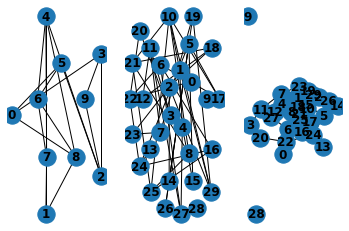

In [10]:
import random as random

def makeGraph (n,p):
    g=nx.Graph()
    for i in range(n):
        g.add_node(i)
    for i in list(g.nodes):
        for j in list(g.nodes):
            if i<j and random.random()<=p:
                g.add_edge(i,j)
    return g

g=makeGraph(10,0.5)
plt.subplot(131)
nx.draw_shell(g, nlist=[range(5, 10), range(5)], with_labels=True, font_weight='bold')
g=makeGraph(30,0.1)
plt.subplot(132)
shells=[[0,1,2,3,4,5],range(5,10),range(10,20),range(20,40),range(40,50)]
nx.draw_shell(g, nlist=shells, with_labels=True, font_weight='bold')
plt.subplot(133)
nx.draw(g,with_labels=True, font_weight='bold')

Beide Graphen sind Objekte des Zufalls. Die Anzahl der Kanten und der Grad der Vernetzung werden durch den Parameter p bestimmt. Die Erzeugung des Graphen folgt dem G(n,p)-Modell nach Gilbert bzw. Erdös und Rényi (die beiden letzteren ungarische Mathematiker).
Die erwartete Anzahl an Kanten |E| für |V|=n ist dann:
$E(\vert{E}\vert)={{n}\choose{2}} p$.
Die Wahrscheinlichkeit dafür, dass ein Knoten v mit k anderen Knoten verbunden ist, ergibt sich zu:  $E(deg(v)=k)={{n-1}\choose{k}} p^{k}(1-p)^{n-1-k}$.
Die Anzahl der Knoten, mit denen eine Knoten v über eine Kante direkt verbunden ist, heißt <b>Grad</b> (engl. degree) von v. Abkürzend schreiben wir dafür $deg(v)$. 
Die Knotengerade eines G(n,p) (oft auch ER(n,p) für Erdös-Rényi, mit etwas anderer Perspektive) Zufallsgraphen sind binomialverteilt B(n,p).

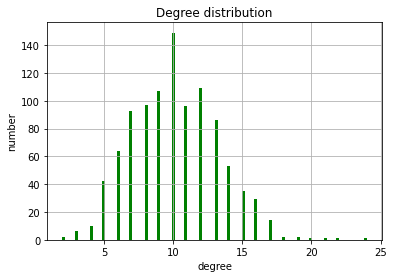

In [11]:
def getDegrees(g):
    result=[]
    for i in list(g.nodes):
        result.append(g.degree(i))
    return result

def getDegreeDistribution(g):
    result=[0]*len(g.nodes)
    for i in getDegrees(g):
        result[i]=result[i]+1
    return result
    

g=makeGraph(1000,0.01)
x=getDegrees(g)
n, bins, patches = plt.hist(x, 100, density=False, facecolor='g', alpha=1)
plt.xlabel('degree')
plt.ylabel('number')
plt.title('Degree distribution')
plt.grid(True)
plt.show()


Für wachsendes n (und konstantes np) kann diese Verteilung durch eine Poisson-Verteilung approximiert werden: $P(deg(v)=k) \to \frac {(np)^k e^{-np}}{k!}$